# What are they writing about these 15 years?
    -Keywords : names, adjectives, verbs
# What genres are they writing about these 15 years?
# What are the sentiments for these 15 years?


In [15]:
import pandas as pd
df = pd.read_csv('guardianheadlinesOut.csv')
df.head()

,DateTime,Headline
0,2019-11-13T16:40:31Z,Rafael Nadal v Daniil Medvedev ATP Finals grou...
1,2019-11-13T16:39:14Z,General election Corbyn in disarray over Scott...
2,2019-11-13T16:39:13Z,Trump impeachment inquiry witness alarmed at m...
3,2019-11-13T16:36:57Z,UK inflation hits three year low London house ...
4,2019-11-13T16:35:59Z,Dalian Atkinson murder police officer facing c...


In [5]:
import dateutil.parser
import re
import dateutil.parser
from datetime import datetime
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
stop_words = set(stopwords.words('english'))

def Clean_TokenizingText(text):
    tokens = []
    text = re.sub(r'\d+', " ", text)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text)
    tokens = [w.lower() for w in tokens]
    tokens = [w for w in tokens if not w in stop_words]
    return tokens

In [16]:
from datetime import datetime
T = [dateutil.parser.parse(i) for i in df['DateTime']] 
dfGuardian=pd.DataFrame()
dfGuardian['year'] = [i.year for i in T]
dfGuardian['month'] = [i.month for i in T]
dfGuardian['day'] =[i.day for i in T]
dfGuardian['hour'] =[i.hour for i in T]
dfGuardian['Date'] = [datetime.strftime(i, "%Y-%m-%d") for i in T]
dfGuardian['HeadlineToken' ]=[Clean_TokenizingText(str(i))  for i in df['Headline']]
dfGuardian.head()

,year,month,day,hour,Date,HeadlineToken
0,2019,11,13,16,2019-11-13,"[rafael, nadal, v, daniil, medvedev, atp, fina..."
1,2019,11,13,16,2019-11-13,"[general, election, corbyn, disarray, scottish..."
2,2019,11,13,16,2019-11-13,"[trump, impeachment, inquiry, witness, alarmed..."
3,2019,11,13,16,2019-11-13,"[uk, inflation, hits, three, year, low, london..."
4,2019,11,13,16,2019-11-13,"[dalian, atkinson, murder, police, officer, fa..."


In [18]:
yearToken ={}
grp=dfGuardian.groupby('year')
for i, group in grp: 
    #print(i)
    tokens = []
    #print(grp.get_group(i).HeadlineToken)
    for token in grp.get_group(i).HeadlineToken:
        #print(token)
        tokens.extend(token)
    yearToken[i] = tokens;

In [19]:
df2 = pd.DataFrame(yearToken.items(),columns=['Year', 'HeadlineToken'])
df2.head()
df2.to_csv('dfByYear.csv')

# tf

In [103]:
from nltk import FreqDist
fdist2005 = FreqDist(df2.HeadlineToken[0])
fdist2006 = FreqDist(df2.HeadlineToken[1])
fdist2007 = FreqDist(df2.HeadlineToken[2])
fdist2008 = FreqDist(df2.HeadlineToken[3])
fdist2009 = FreqDist(df2.HeadlineToken[4])
fdist2010 = FreqDist(df2.HeadlineToken[5])
fdist2011 = FreqDist(df2.HeadlineToken[6])
fdist2012 = FreqDist(df2.HeadlineToken[7])
fdist2013 = FreqDist(df2.HeadlineToken[8])
fdist2014 = FreqDist(df2.HeadlineToken[9])
fdist2015 = FreqDist(df2.HeadlineToken[10])
fdist2016 = FreqDist(df2.HeadlineToken[11])
fdist2017 = FreqDist(df2.HeadlineToken[12])
fdist2018 = FreqDist(df2.HeadlineToken[13])
fdist2019 = FreqDist(df2.HeadlineToken[14])

In [20]:
from nltk import FreqDist
for i in range(0, len(df2)):
    #print(i)
    for j in enumerate(df2.HeadlineToken):
        df2.HeadlineToken[i]


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


# idf

In [182]:
#steps toward IDF

list2005 = [(word[0]) for word in fdist2005.most_common(len(df2.HeadlineToken[0]))]
list2006 = [(word[0]) for word in fdist2006.most_common(len(df2.HeadlineToken[1]))]
list2007 = [(word[0]) for word in fdist2007.most_common(len(df2.HeadlineToken[2]))]
list2008 = [(word[0]) for word in fdist2008.most_common(len(df2.HeadlineToken[3]))]
list2009 = [(word[0]) for word in fdist2009.most_common(len(df2.HeadlineToken[4]))]
list2010 = [(word[0]) for word in fdist2010.most_common(len(df2.HeadlineToken[5]))]
list2011 = [(word[0]) for word in fdist2011.most_common(len(df2.HeadlineToken[6]))]
list2012 = [(word[0]) for word in fdist2012.most_common(len(df2.HeadlineToken[7]))]
list2013 = [(word[0]) for word in fdist2013.most_common(len(df2.HeadlineToken[8]))]
list2014 = [(word[0]) for word in fdist2014.most_common(len(df2.HeadlineToken[9]))]
list2015 = [(word[0]) for word in fdist2015.most_common(len(df2.HeadlineToken[10]))]
list2016 = [(word[0]) for word in fdist2016.most_common(len(df2.HeadlineToken[11]))]
list2017 = [(word[0]) for word in fdist2017.most_common(len(df2.HeadlineToken[12]))]
list2018 = [(word[0]) for word in fdist2018.most_common(len(df2.HeadlineToken[13]))]
list2019 = [(word[0]) for word in fdist2019.most_common(len(df2.HeadlineToken[14]))]
listRD = list2005 + list2006 +list2007+list2008+list2009
#istRD =list2007+list2008
#listRD = list2005 + list2006 +list2007+list2008+list2009+list2010+list2011+list2012+list2013+list2014+list2015+list2016+list2017+list2018+list2019

# tf-idf

# 2005, 2006, 2007, 2008 and 2009

In [14]:
#Democratic TF-IDF 2005
ifn2005 = []

for word in fdist2005.most_common(len(df2.HeadlineToken[0])):
    x = (math.log(5 / listRD.count(word[0]))*int(word[1]) / len(df2.HeadlineToken[0]))
    if x != 0:
        ifn2005.append((word[0],x))

        #Democratic TF-IDF 2005
ifn2006 = []

for word in fdist2006.most_common(len(df2.HeadlineToken[1])):
    x = (math.log(5 / listRD.count(word[0]))*int(word[1]) / len(df2.HeadlineToken[1]))
    if x != 0:
        ifn2006.append((word[0],x))

#Republican TF-IDF
import math
ifn2007 = []

for word in fdist2007.most_common(len(df2.HeadlineToken[2])):
    x = (math.log(5 / listRD.count(word[0]))*int(word[1]) / len(df2.HeadlineToken[2]))
    if x != 0:
        ifn2007.append((word[0],x))
        
#Democratic TF-IDF 2008
ifn2008 = []


for word in fdist2008.most_common(len(df2.HeadlineToken[3])):
    x = (math.log(5 / listRD.count(word[0]))*int(word[1]) / len(df2.HeadlineToken[3]))
    if x != 0:
        ifn2008.append((word[0],x))

#Democratic TF-IDF
ifn2009 = []


for word in fdist2009.most_common(len(df2.HeadlineToken[4])):
    x = (math.log(5 / listRD.count(word[0]))*int(word[1]) / len(df2.HeadlineToken[4]))
    if x != 0:
        ifn2009.append((word[0],x))

NameError: name 'fdist2005' is not defined

In [201]:
#add multiplier so we can round to nearest int later
tfidf2007 = [(word, number * 10000000) for (word,number) in ifn0]
tfidf2009 = [(word, number * 10000000) for (word,number) in ifn0d]
tfidf2008 = [(word, number * 10000000) for (word,number) in ifn2008]
tfidf2005 = [(word, number * 10000000) for (word,number) in ifn2005]
tfidf2006 = [(word, number * 10000000) for (word,number) in ifn2006]

NameError: name 'ifn2005' is not defined

In [198]:
wc2005 = []
wc2006 = []
wc2007 = []
wc2008 = []
wc2009 = []

#roundt tfidf to nearest int for every word and put the word into the as many times as the value
for (word,number) in tfidf2005:
    for i in range(int(number)):
        wc2005.append(word)

#roundt tfidf to nearest int for every word and put the word into the as many times as the value
for (word,number) in tfidf2006:
    for i in range(int(number)):
        wc2006.append(word)
        
#roundt tfidf to nearest int for every word and put the word into the as many times as the value
for (word,number) in tfidf2007:
    for i in range(int(number)):
        wc2007.append(word)

#roundt tfidf to nearest int for every word and put the word into the as many times as the value
for (word,number) in tfidf2008:
    for i in range(int(number)):
        wc2008.append(word)       
        
        
#roundt tfidf to nearest int for every word and put the word into the as many times as the value
for (word,number) in tfidf2009:
    for i in range(int(number)):
        wc2009.append(word)

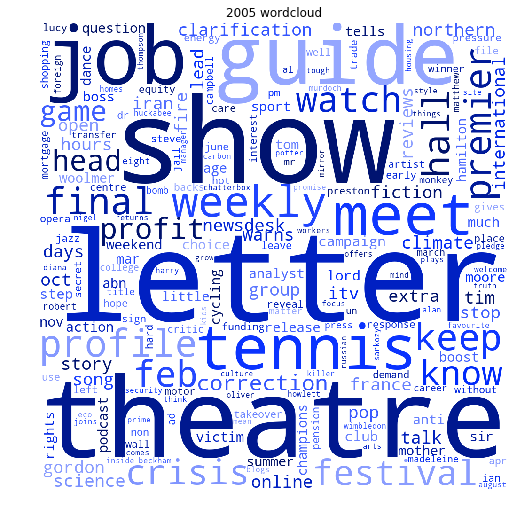

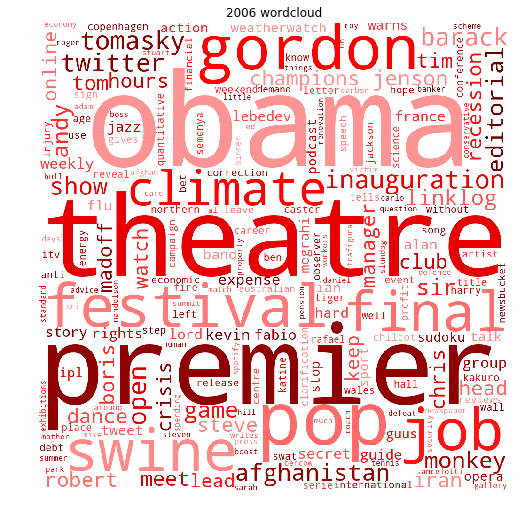

In [203]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np

#Colors for wordcloud
def blue_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(230,100%%, %d%%)" % np.random.randint(20,80))

def red_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,100%%, %d%%)" % np.random.randint(20,80))

#List to string so it can be read by wordcloud
textDem = " ".join(word for word in wc2007)
textRep = " ".join(word for word in wc2009)

#Create wordcloud
wordcloudDem = WordCloud(collocations=False, width = 1000, height = 1000, background_color="white").generate(textDem)

wordcloudDem.recolor(color_func = blue_color_func)
plt.figure(figsize = (7, 7), facecolor = None) 
plt.imshow(wordcloudDem) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("2005 wordcloud")
plt.show()

#Create wordcloud
wordcloudRep = WordCloud(collocations=False, width = 1000, height = 1000, background_color="white").generate(textRep)

wordcloudRep.recolor(color_func = red_color_func)
plt.figure(figsize = (7, 7), facecolor = None) 
plt.imshow(wordcloudRep) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("2006 wordcloud")
plt.show()



# Data Cleaning 

In [365]:
import pandas as pd

df2 = pd.DataFrame()


df2['headline_By_Year']=dfGuardian.groupby([dfGuardian.year]).Headline

Hl= [df2.headline_By_Year[0][1].values,  df2.headline_By_Year[1][1].values, 
df2.headline_By_Year[2][1].values, 
df2.headline_By_Year[3][1].values, 
df2.headline_By_Year[4][1].values,
df2.headline_By_Year[5][1].values,
df2.headline_By_Year[6][1].values,
df2.headline_By_Year[7][1].values,
df2.headline_By_Year[8][1].values,
df2.headline_By_Year[9][1].values,
df2.headline_By_Year[10][1].values,
df2.headline_By_Year[11][1].values,
df2.headline_By_Year[12][1].values,
df2.headline_By_Year[13][1].values,
df2.headline_By_Year[14][1].values]

df2['Headline_By_Year'] =[i for i in Hl]

df2['headline_Count'] = [len(i) for i in df2['Headline_By_Year']]

df2['year']=[i for i in sorted(dfGuardian.year.unique())]

df2.reset_index(inplace = True, drop=True)
df2.head(15)
#print(df2['Headline_By_Year'][2])

,headline_By_Year,Headline_By_Year,headline_Count,year
0,"(2005, [Intel revamps its image to become cons...",[Intel revamps its image to become consumer br...,763,2005
1,"(2006, [Into Great Silence, Belle de jour, Nig...","[Into Great Silence, Belle de jour, Night at t...",70919,2006
2,"(2007, [Unused Christmas present vouchers are ...",[Unused Christmas present vouchers are gift to...,71396,2007
3,"(2008, [Saracens rule out move for Cipriani ov...",[Saracens rule out move for Cipriani over wage...,72638,2008
4,"(2009, [Luxembourg PO Tamayo Xenakis Complete ...",[Luxembourg PO Tamayo Xenakis Complete Orchest...,70708,2009
5,"(2010, [Aston Villa s Gérard Houllier insists ...",[Aston Villa s Gérard Houllier insists I am no...,69907,2010
6,"(2011, [Said Done the 2011 awards Sepp Blatter...",[Said Done the 2011 awards Sepp Blatter Gigi B...,70819,2011
7,"(2012, [TV review Alan Carr s New Year Specsta...",[TV review Alan Carr s New Year Specstacular J...,70578,2012
8,"(2013, [A League what to look out for in round...","[A League what to look out for in round 13, To...",71977,2013
9,"(2014, [The morning after how to lessen your h...",[The morning after how to lessen your hangover...,72117,2014


In [123]:
import re
import os 
import nltk
import pandas as pd
import dateutil.parser
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 
from datetime import datetime
# Create tokenizing function which take input as a long string
stop_words = set(stopwords.words('english'))
def Clean_TokenizingText(text):
    tokens = []
    text = re.sub(r'\d+', " ", text)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text)
    tokens = [w.lower() for w in tokens]
    tokens = [w for w in tokens if not w in stop_words]
    return tokens

In [184]:
h=[]
h1=[]
h2=[]

for i in df2['headline_By_Year']:
    h.append(i[0])
    h1.append(i[1].values)
    h2.append(len(i[1].values))
    

In [349]:
len(h1[1])

70919

In [192]:
df3= pd.DataFrame()
df3['year']=h
df3['Headlines']=h1
df3['Headlines_count']=h2
df3['Headlines_tokenized']=[Clean_TokenizingText(str(i)) for i in h1]
df3.head()

,year,Headlines,Headlines_count,Headlines_tokenized
0,2005,[Intel revamps its image to become consumer br...,763,"[intel, revamps, image, become, consumer, bran..."
1,2006,"[Into Great Silence, Belle de jour, Night at t...",70919,"[great, silence, belle, de, jour, night, museu..."
2,2007,[Unused Christmas present vouchers are gift to...,71396,"[unused, christmas, present, vouchers, gift, r..."
3,2008,[Saracens rule out move for Cipriani over wage...,72638,"[saracens, rule, move, cipriani, wage, demands..."
4,2009,[Luxembourg PO Tamayo Xenakis Complete Orchest...,70708,"[luxembourg, po, tamayo, xenakis, complete, or..."


In [208]:
hl_2005_len = len(df3.Headlines_tokenized[0]) # Calculate the length 
hl_2006_len = len(df3.Headlines_tokenized[1])
all =hl_2005_len +hl_2006_len #Total length of all headline

In [218]:
# Calculate term frequency
from collections import Counter
words_Freq_2005 = Counter(df3.Headlines_tokenized[0]).items() #counting words 
words_common_2005 = Counter(df3.Headlines_tokenized[0]).most_common(10) #5 most common words
print("The top 5 terms and their frequency count within democratic party are :")
print(words_common_2005)
words_Freq_2006  = Counter(df3.Headlines_tokenized[1]).items()
words_common_2006 = Counter(df3.Headlines_tokenized[1]).most_common(0)  #5 most common words
print("The top 5 terms and their frequency count within democratic party are :")
print(words_common_2006)

The top 5 terms and their frequency count within democratic party are :
[('year', 39), ('football', 35), ('new', 31), ('letters', 26), ('review', 20), ('rugby', 18), ('us', 17), ('union', 17), ('christmas', 17), ('police', 16)]
The top 5 terms and their frequency count within democratic party are :
[('great', 1), ('silence', 1), ('belle', 1), ('de', 1), ('jour', 1), ('night', 1), ('museum', 1), ('observer', 1), ('review', 1), ('mythology', 1)]


In [219]:
#Calculate TF for democratic party tweets
words_Freq_2005_Dict = {}
for word, val in words_Freq_2005:
    words_Freq_2005_Dict[word] = float(val)/hl_2005_len
    
#Calculate TF for republicans party tweets
words_Freq_2006_Dict = {}
for word, val in words_Freq_2006:
    words_Freq_2006_Dict[word] = float(val)/hl_2006_len

In [306]:
print(words_Freq_2005_Dict['football'])

283.66352893836125


In [271]:
#calculate tf: 
def getTf(tokens): 
    tf = {}
    wordCounts = Counter(tokens)
    for word, count in wordCounts.items():
        tf[word] = count
    return tf 

In [220]:
# Top 5 terms
print("The top 5 terms within democratic party are :")
for word, val in words_common_2005:
    print(word, "%0.10f" % (float(val)/hl_2005_len))

print("\n The top 5 terms within republic party are :")
for word, val in words_common_2006:
    print(word, "%0.10f" % (float(val)//hl_2006_len))

The top 5 terms within democratic party are :
year 0.0101934135
football 0.0091479352
new 0.0081024569
letters 0.0067956090
review 0.0052273915
rugby 0.0047046524
us 0.0044432828
union 0.0044432828
christmas 0.0044432828
police 0.0041819132

 The top 5 terms within republic party are :
great 0.0000000000
silence 0.0000000000
belle 0.0000000000
de 0.0000000000
jour 0.0000000000
night 0.0000000000
museum 0.0000000000
observer 0.0000000000
review 0.0000000000
mythology 0.0000000000


In [264]:
# Finding unique words in the two party members tweets
all_Words = df3.Headlines_tokenized[0] +  df3.Headlines_tokenized[1] #combine two documents
unique_words = set(all_Words)
print("Number of unique words:", len(unique_words))

Number of unique words: 2354


In [230]:
# Finding unique words for both partys
Set_2005 = set(df3.Headlines_tokenized[0]) 
Set_2006 = set( df3.Headlines_tokenized[1])
# Number of documents
NumberOf_Docs = 2
Doc_Count = 0.0
IDF_Dict = {}

In [297]:
import numpy as np
#Calculate  IDF
for word in unique_words:
    if word in Set_2005:
        Doc_Count += 1
    if word in Set_2006:
        Doc_Count += 1
        
    IDF_Dict[word] = (NumberOf_Docs/Doc_Count)

    Doc_Count = 0
print(Doc_Count)
    


0


In [308]:
import numpy as np

for w in words_Freq_2005_Dict:
    words_Freq_2005_Dict[w] = (words_Freq_2005_Dict[w]* np.log(IDF_Dict[w])*1000000)
#print(words_Freq_2005_Dict)
for w in  words_Freq_2006_Dict:
     words_Freq_2006_Dict[w] =  words_Freq_2006_Dict[w]*IDF_Dict[w]

In [300]:
def getTf(tokens): 
    tf = {}
    wordCounts = Counter(tokens)
    for word, count in wordCounts.items():
        tf[word] = count
    return tf   

In [17]:
tf2005=getTf(df3.Headlines_tokenized[0])
tf2006=getTf(df3.Headlines_tokenized[1])

NameError: name 'getTf' is not defined

In [ ]:
wordSet=set()

In [332]:
df3.Headlines_tokenized.items()


In [260]:
import os
cwd = os.getcwd()
print(cwd)

/Users/estherthianhlun/dtu/Msc_Digital_Media/E2019/02805/ExamProj


In [ ]:
path = "/Users/estherthianhlun/dtu/Msc_Digital_Media/E2019/02805/ExamProj"
directory = os.fsencode(path)
transDict = {}
transOrg = {}

#Initializing and cleaning data: 
#Adding to dict: 
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    file = open(path+'/'+filename, "r")
    f = file.read()
    tokens = clean(f)
    transDict[filename] = calculateSentiment(tokens)
    transOrg[filename] = tokens

In [342]:
#calculate tf: 
def getTf(tokens): 
    tf = {}
    wordCounts = Counter(tokens)
    for word, count in wordCounts.items():
        tf[word] = count
    return tf    
    
#Helper function for idf: 
def computeNumberOfDocuments(word): 
    counter=0; 
    for key, val in df3.Headlines_tokenized.items():
        if word in val:
            counter+=1
    return counter    

def getIdf(tokens, N):
    idf = {}
    for word in tokens:
        idf[word] =  math.log(N/computeNumberOfDocuments(word))
    return idf    
        
#Calculating tf-idf:
def getTfIdf(tokens, N):
    tf = getTf(tokens)
    idf = getIdf(tokens, N)
    tfidf = {}
    for key, val in tf.items():
        tfidf[key] = idf[key] * val
    return tfidf  

In [256]:

file = open(path+'/'+"s07e22.txt", "r").read()
tokens = clean(file)
tfidf = getTfIdf(tokens, len(transOrg))

NameError: name 'transOrg' is not defined

In [ ]:
wordCloudPositive = ''
for key, val in tfidf.items(): 
    for i in range(int(val)):
        wordCloudPositive += str(key) + ' '

In [ ]:
wordcloud1 = WordCloud(collocations = False, background_color='white', width=800, height=400).generate(wordCloudPositive)
plt.figure( figsize=(20,10), facecolor='w')
plt.imshow(wordcloud1)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()